<a href="https://colab.research.google.com/github/milaml/VNP/blob/master/LabDrugaGrupa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/bin/bash: -c: line 2: syntax error: unexpected end of file
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser libfuse3-3 liblzo2-2 libudev1 snapd squashfs-tools systemd-hwe-hwdb
  udev
Suggested packages:
  apparmor-profiles-extra apparmor-utils fuse3 zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver libfuse3-3 liblzo2-2 snapd squashfs-tools
  systemd-hwe-hwdb udev
The following packages will be upgraded:
  libudev1
1 upgraded, 9 newly installed, 0 to remove and 17 not upgraded.
Need to get 26.4 MB of archives.
After this operation, 116 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 apparmor amd64 3.0.4-2ubuntu2.2 [595 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblzo2-2 amd64 2.10-2build3 [53.7 kB]
Get:3 http://archive.ubu
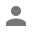
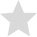
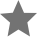
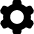
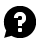
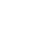
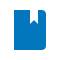
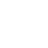
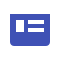
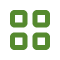
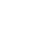
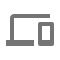
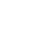
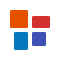
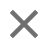
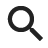
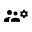
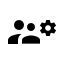
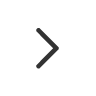
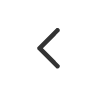
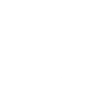
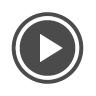
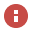
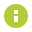
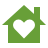
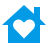
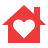
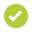
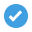
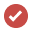

In [ ]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update|
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
from selenium.webdriver.common.by import By
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://play.google.com/store/apps?hl=en&gl=US")
print(wd.page_source)  # results
#divs = wd.find_element(By.TAG_NAME, 'div')

In [ ]:
import numpy as np
import pandas as pd   #za data frames
from datetime import datetime
from datetime import date
import requests
from bs4 import BeautifulSoup    #za parsiranje na html
from IPython.display import HTML
requests.packages.urllib3.disable_warnings   #da ignorireame warnings
%matplotlib inline
import matplotlib.pyplot as plt   #za grafici
import warnings
warnings.filterwarnings("ignore")


In [ ]:
naslov = wd.find_elements(By.CLASS_NAME,'Epkrse')  #klasa za naslovi
#divs = wd.find_element(By.TAG_NAME, 'div')

ratings = wd.find_elements(By.CLASS_NAME,'LrNMN') #klasa za ratings


In [ ]:


naslovList = []
for ime in naslov:
  naslovList.append(ime.text)

naslovList

['Instagram',
 'Snapchat',
 'TikTok',
 'Temu: Shop Like a Billionaire',
 'Messenger',
 'WhatsApp Messenger',
 'AT&T Personal Cloud',
 'TextNow: Call + Text Unlimited',
 'SHEIN-Shopping Online',
 'Telegram',
 'Facebook',
 'Reddit',
 'Spotify: Music and Podcasts',
 'X',
 'Talkie: Soulful AI',
 'Discord: Talk, Chat & Hang Out',
 'Walmart: Shopping & Savings',
 "McDonald's",
 'Netflix',
 'Samsung Smart Switch Mobile',
 'LinkedIn: Jobs & Business News',
 'Google Chat',
 'Microsoft Teams',
 'Indeed Job Search',
 'DoorDash - Dasher',
 'WhatsApp Business',
 'Uber - Driver: Drive & Deliver',
 'Samsung Email',
 'Zillow: Homes For Sale & Rent',
 'Instacart: Food delivery today',
 'ADP Mobile Solutions',
 "Sam's Club",
 'Poshmark - Sell & Shop Online',
 'Subway®',
 'Pizza Hut - Food Delivery & Ta',
 'Costco Wholesale',
 'Wendy’s',
 'Klarna | Shop now. Pay later.',
 'Me@Walmart',
 'Citi Mobile®',
 'Messenger',
 'WhatsApp Messenger',
 'Telegram',
 'Reddit',
 'Spotify: Music and Podcasts',
 'Discord:

In [ ]:
ratingsList = []

for rating in ratings:
  rating = rating.text.split("/n")[0]
  ratingsList.append(rating)

ratingsList

['4.0',
 '',
 '4.1',
 '',
 '4.3',
 '',
 '4.7',
 '',
 '4.1',
 '',
 '4.3',
 '',
 '4.4',
 '',
 '4.5',
 '',
 '4.5',
 '',
 '4.3',
 '',
 '3.4',
 '',
 '2.8',
 '',
 '4.4',
 '',
 '3.8',
 '',
 '4.3',
 '',
 '4.3',
 '',
 '4.7',
 '',
 '4.6',
 '',
 '4.2',
 '',
 '4.1',
 '',
 '4.2',
 '',
 '4.4',
 '',
 '4.7',
 '',
 '4.7',
 '',
 '4.4',
 '',
 '4.1',
 '',
 '4.6',
 '',
 '4.1',
 '',
 '4.7',
 '',
 '4.2',
 '',
 '4.4',
 '',
 '4.9',
 '',
 '4.7',
 '',
 '4.4',
 '',
 '4.3',
 '',
 '4.6',
 '',
 '4.5',
 '',
 '4.5',
 '',
 '4.7',
 '',
 '4.7',
 '',
 '4.1',
 '',
 '4.3',
 '',
 '4.3',
 '',
 '2.8',
 '',
 '4.4',
 '',
 '4.3',
 '',
 '4.2',
 '',
 '4.6',
 '',
 '4.2',
 '',
 '4.2',
 '',
 '4.7',
 '',
 '4.1',
 '',
 '4.8',
 '',
 '4.5',
 '',
 '4.1',
 '',
 '4.0',
 '',
 '4.5',
 '',
 '4.7',
 '',
 '4.7',
 '',
 '4.7',
 '',
 '4.5',
 '',
 '4.4',
 '',
 '4.1',
 '',
 '4.4',
 '',
 '4.4',
 '',
 '4.7',
 '',
 '4.4',
 '',
 '3.4',
 '',
 '3.8',
 '',
 '3.5',
 '',
 '4.4',
 '',
 '4.1',
 '',
 '4.4',
 '',
 '4.0',
 '',
 '4.3',
 '',
 '4.1',
 '',
 '4.3',
 '',

In [ ]:
matrix = []

for i in range(0, len(naslov)):
  if ratingsList[i] !='':
    matrix.append([naslovList[i], ratingsList[i]])


matrix

[['Instagram', '4.0'],
 ['TikTok', '4.1'],
 ['Messenger', '4.3'],
 ['AT&T Personal Cloud', '4.7'],
 ['SHEIN-Shopping Online', '4.1'],
 ['Facebook', '4.3'],
 ['Spotify: Music and Podcasts', '4.4'],
 ['Talkie: Soulful AI', '4.5'],
 ['Walmart: Shopping & Savings', '4.5'],
 ['Netflix', '4.3'],
 ['LinkedIn: Jobs & Business News', '3.4'],
 ['Microsoft Teams', '2.8'],
 ['DoorDash - Dasher', '4.4'],
 ['Uber - Driver: Drive & Deliver', '3.8'],
 ['Zillow: Homes For Sale & Rent', '4.3'],
 ['ADP Mobile Solutions', '4.3'],
 ['Poshmark - Sell & Shop Online', '4.7'],
 ['Pizza Hut - Food Delivery & Ta', '4.6'],
 ['Wendy’s', '4.2'],
 ['Me@Walmart', '4.1'],
 ['Messenger', '4.2'],
 ['Telegram', '4.4'],
 ['Spotify: Music and Podcasts', '4.7'],
 ['Netflix', '4.7'],
 ['Amazon Shopping', '4.4'],
 ['Uber - Request a ride', '4.1'],
 ['Tubi: Movies & Live TV', '4.6'],
 ['Pandora - Music & Podcasts', '4.1'],
 ['Disney+', '4.7'],
 ['Indeed Job Search', '4.2'],
 ['Pinterest', '4.4'],
 ['Threads, an Instagram app',

In [ ]:
df = pd.DataFrame(np.array(matrix), columns=['Name', 'Rating'])

df

,Name,Rating
0,Instagram,4.0
1,TikTok,4.1
2,Messenger,4.3
3,AT&T Personal Cloud,4.7
4,SHEIN-Shopping Online,4.1
5,Facebook,4.3
6,Spotify: Music and Podcasts,4.4
7,Talkie: Soulful AI,4.5
8,Walmart: Shopping & Savings,4.5
9,Netflix,4.3


<Axes: >

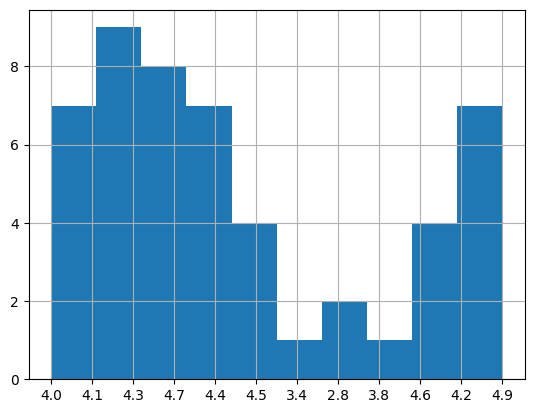

In [ ]:
df['Rating'].hist()
